# Erzeugung von Trainingsdaten für die SOM

In [ ]:
import numpy as np
input_dim = 2
np.random.uniform(low=0.0, high=1.0, size=input_dim)

In [2]:
nr_clusters = 3
centroids = np.random.uniform(low=0.0, high=1.0, size=(nr_clusters, 2))
centroids

array([[0.60216909, 0.63214703],
       [0.86063128, 0.96938132],
       [0.43364088, 0.53508172]])

In [3]:
for centroid in centroids:
    print(centroid)

[0.60216909 0.63214703]
[0.86063128 0.96938132]
[0.43364088 0.53508172]


In [1]:
def generate_data(nr_clusters=3, nr_samples_per_cluster=100):

    centroids = np.random.uniform(low=0.0, high=1.0, size=(nr_clusters, 2))

    data = np.zeros( (nr_clusters*nr_samples_per_cluster, 2) )

    i = 0
    for centroid in centroids:
        for sample_nr in range(nr_samples_per_cluster):
            offset_vec =np.random.normal(scale=0.05, size=2)
            data_point = centroid + offset_vec
            data[i] = data_point
            i+=1

    return data

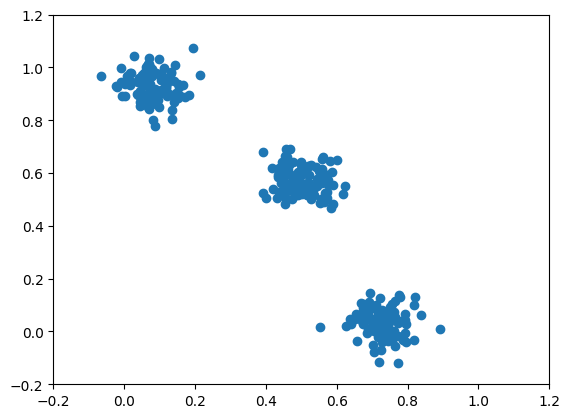

In [20]:
D = generate_data()
import matplotlib.pyplot as plt
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)
plt.scatter(D[:,0], D[:,1] )
plt.show()

# Experimente mit einer SOM

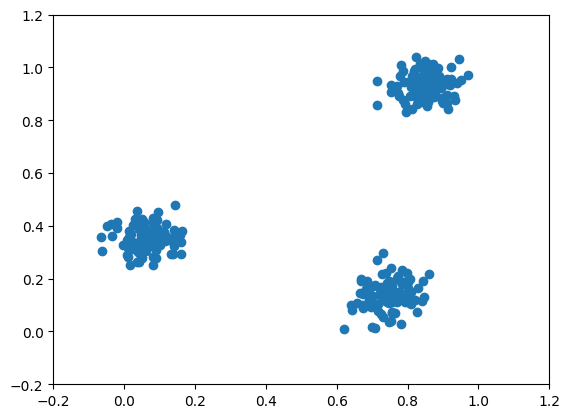

I have generated 49 neurons.


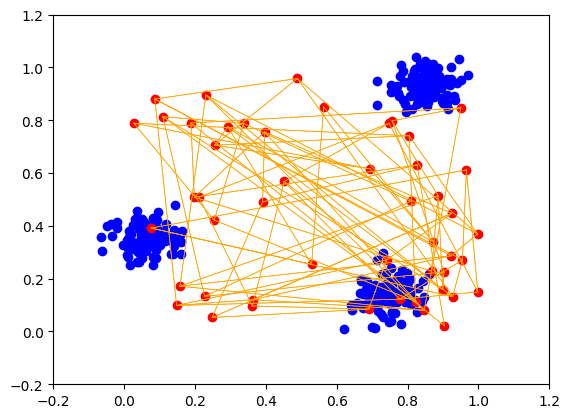

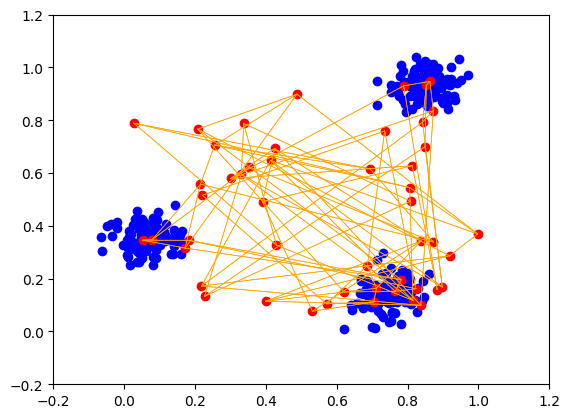

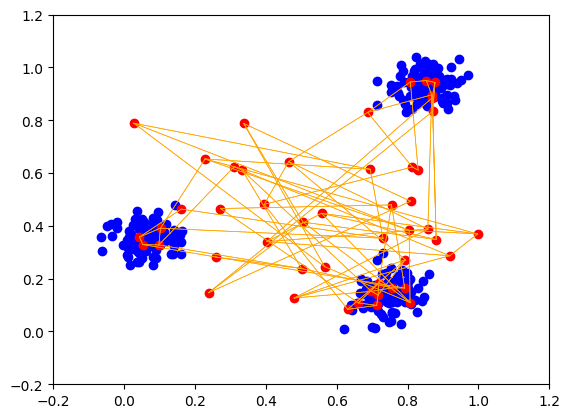

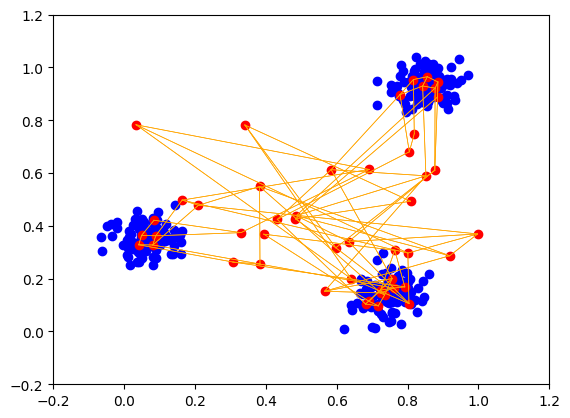

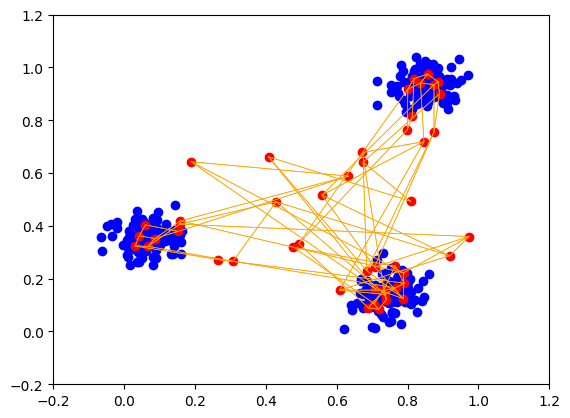

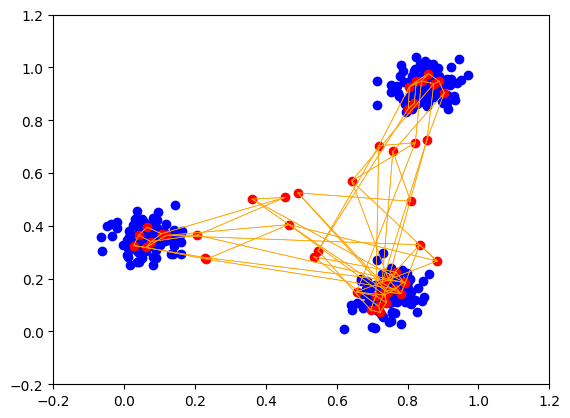

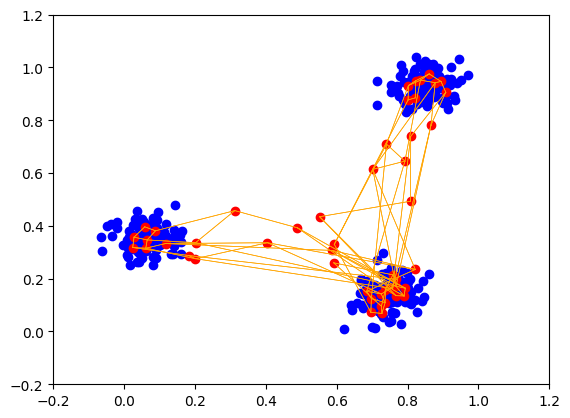

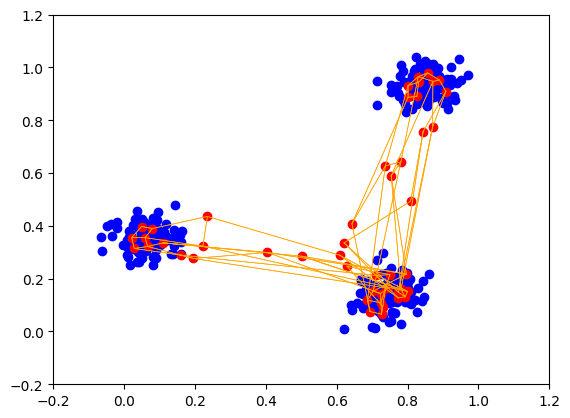

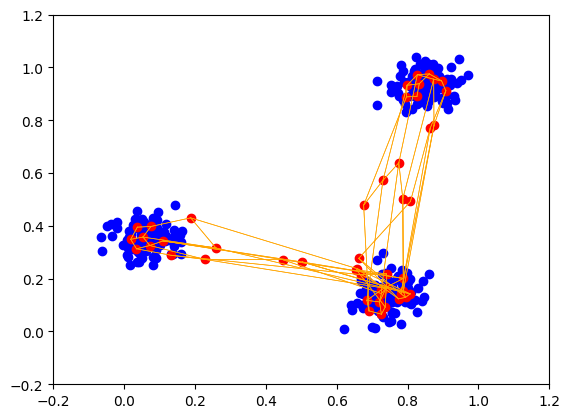

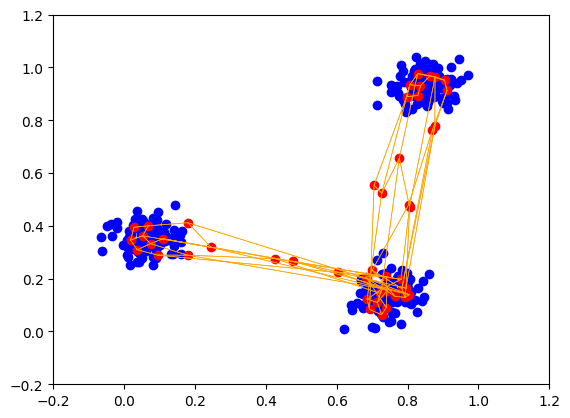

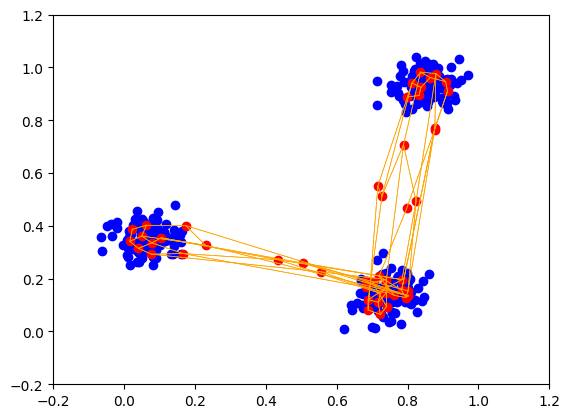

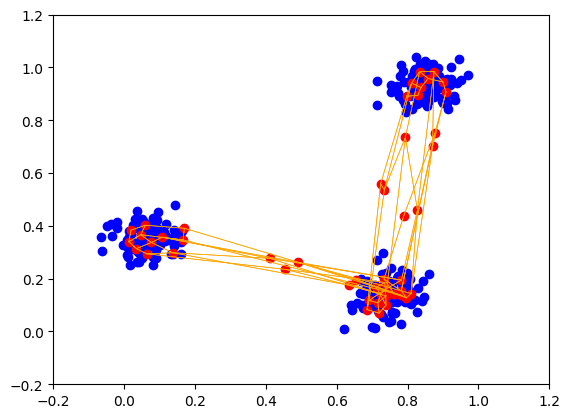

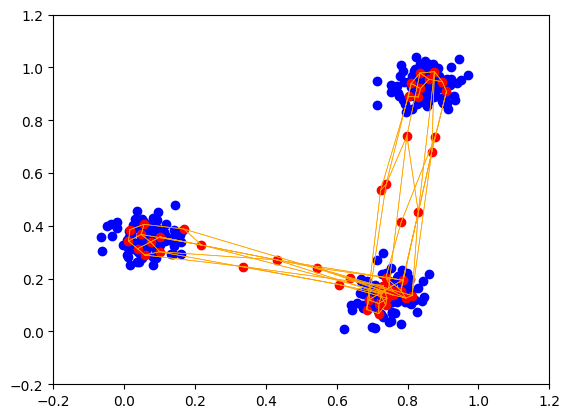

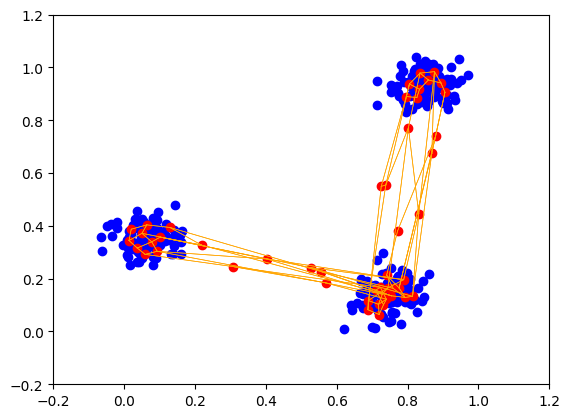

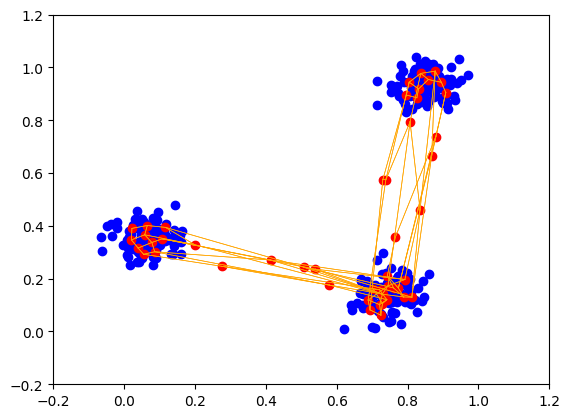

In [1]:
from som import som

import numpy as np

def generate_data(nr_clusters=3, nr_samples_per_cluster=100):

    centroids = np.random.uniform(low=0.0, high=1.0, size=(nr_clusters, 2))

    data = np.zeros( (nr_clusters*nr_samples_per_cluster, 2) )

    i = 0
    for centroid in centroids:
        for sample_nr in range(nr_samples_per_cluster):
            offset_vec =np.random.normal(scale=0.05, size=2)
            data_point = centroid + offset_vec
            data[i] = data_point
            i+=1

    return data

# 1. Generate training data for the SOM
D = generate_data()

# 2. Show the training data
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:,1] )
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.show()

# 3. Generate a SOM
my_som = som(input_dim=2, map_side_len=7)

# 4. Train the SOM
NR_TRAIN_STEPS = 30000
NR_DATA_POINTS = D.shape[0]

for train_step in range(NR_TRAIN_STEPS):
    rnd_data_point_index = np.random.randint(low=0, high=NR_DATA_POINTS)
    data_point = D[rnd_data_point_index]

    # adapt SOM to current train data point
    my_som.adapt( data_point )
    
    
    if train_step % 2000 == 0:
        
        # show data points
        plt.scatter(D[:,0], D[:,1], color="blue" )
                
        # visualize weight vector of all SOM neurons
        coords = np.zeros( (my_som.nr_neurons, 2) )
        for i,n in enumerate(my_som.list_neurons):
            coords[i,:] = n.weight_vec
        plt.scatter(coords[:,0], coords[:,1], color="red")
        
        # visualize topology of SOM, i.e.
        # draw a line between each pair of neighbored SOM neurons
        for n in my_som.list_neurons:
            
            x1, y1 = n.weight_vec                       
            list_of_neighbored_ids = my_som.get_neighbors( n )
            for neighbor_id in list_of_neighbored_ids:
                n2 = my_som.get_neuron_from_id( neighbor_id )
                x2, y2 = n2.weight_vec
                plt.plot( [x1,x2], [y1,y2], color="orange", linewidth=0.5 )
        
        plt.xlim(-0.2, 1.2)
        plt.ylim(-0.2, 1.2)
        plt.show()